In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
raw_production_data = pd.read_csv("../datasets/capstone/coffee-production--USDA-FAS--psd_coffee.csv")

In [4]:
uncleaned_production_data = raw_production_data.copy()
production_data = uncleaned_production_data[["Country_Name", "Market_Year", "Attribute_Description", "Value"]]
production_data.loc[:, "Value (60kg bags)"] = production_data.loc[:, "Value"] * 1000
production_data.drop("Value", axis = 1, inplace = True)

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

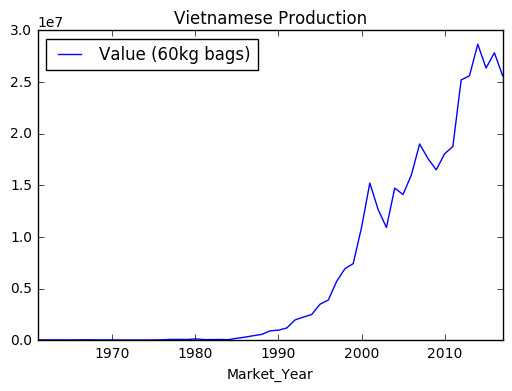

In [5]:
production_data[(production_data["Country_Name"] == "Vietnam") 
                          & (production_data["Attribute_Description"] == "Robusta Production")
                         ].plot(x = "Market_Year", y = "Value (60kg bags)")
plt.title("Vietnamese Production")
plt.show()

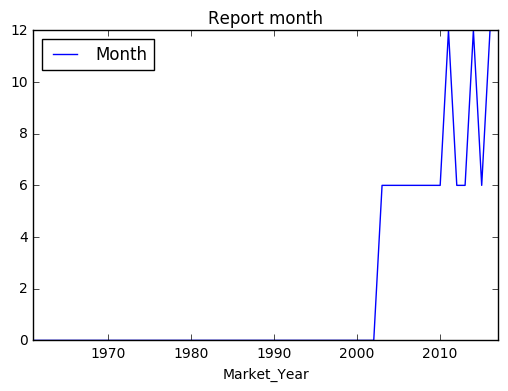

In [6]:
uncleaned_production_data[uncleaned_production_data["Country_Name"] == "Brazil"].plot(x = "Market_Year", y = "Month")
plt.title("Report month")
plt.show()

In [7]:
ICO_country_classifications = pd.read_csv("../datasets/capstone/ICO composite indicator index country classification.csv")
ICO_country_classifications.columns = ["Country", "Brazilian Naturals","Colombian Milds","Other Milds", "Robustas"]

In [8]:
def group_production_by_category(ICO_category = None, data_desc = None):
    # Get country names from ICO classifications dataframe
    category_dataframe = ICO_country_classifications[ICO_country_classifications[ICO_category]][["Country"]]
    
    # Select production data for these countries
    category_data_dataframe = category_dataframe.merge(production_data, left_on = "Country", right_on = "Country_Name").drop("Country_Name", axis = 1)
    
    category_data_production_dataframe = category_data_dataframe[category_data_dataframe["Attribute_Description"] == data_desc].drop("Attribute_Description", axis = 1)

    return category_data_production_dataframe


In [9]:
# Alternatively, could use a minmax scaler across rows

def production_weights_by_year(category_dataframe = None):
    
    # Initialize an empty dataframe
    category_production_weights = pd.DataFrame(columns = category_production_by_year.columns, index = category_production_by_year.index.values)
    
    # Calculate total production numbers
    category_production_by_year = category_dataframe.pivot_table(index = "Market_Year", columns = "Country", aggfunc = 'sum', margins = True)["Value (60kg bags)"]

    # Convert country production figures to percents
    for column in category_production_by_year:
        category_production_weights.loc[:, column] = category_production_by_year.loc[:, column] / category_production_by_year["All"]
        
    return category_production_weights

In [10]:
brazlian_naturals_production = group_production_by_category("Brazilian Naturals", "Arabica Production")
colombian_milds_production = group_production_by_category("Colombian Milds", "Arabica Production")
other_milds_production = group_production_by_category("Other Milds", "Arabica Production")
robusta_production = group_production_by_category("Robustas", "Robusta Production")


In [11]:
aggregate_brazlian_naturals_production = brazlian_naturals_production.groupby(by = "Market_Year")["Value (60kg bags)"].sum()
aggregate_colombian_milds_production = colombian_milds_production.groupby(by = "Market_Year")["Value (60kg bags)"].sum()
aggregate_other_milds_production = other_milds_production.groupby(by = "Market_Year")["Value (60kg bags)"].sum()
aggregate_robusta_production = robusta_production.groupby(by = "Market_Year")["Value (60kg bags)"].sum()


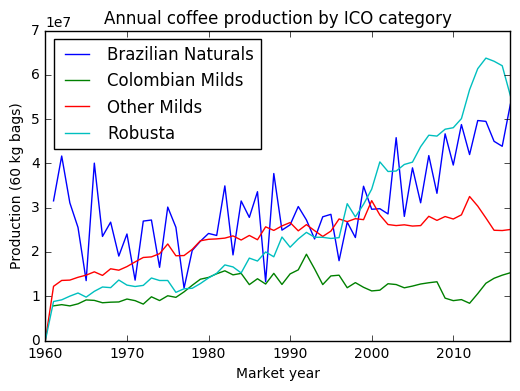

In [12]:
aggregate_brazlian_naturals_production.plot()
aggregate_colombian_milds_production.plot()
aggregate_other_milds_production.plot()
aggregate_robusta_production.plot()

plt.title("Annual coffee production by ICO category")
plt.legend(["Brazilian Naturals", "Colombian Milds", "Other Milds", "Robusta"], loc = 'best')
plt.xlabel("Market year")
plt.ylabel("Production (60 kg bags)")
plt.show()

In [13]:
brazilian_naturals_production_weights = production_weights_by_year(brazlian_naturals_production)
colombian_milds_production_weights = production_weights_by_year(colombian_milds_production)
other_milds_production_weights = production_weights_by_year(other_milds_production)
robusta_production_weights = production_weights_by_year(robusta_production)

UnboundLocalError: local variable 'category_production_by_year' referenced before assignment

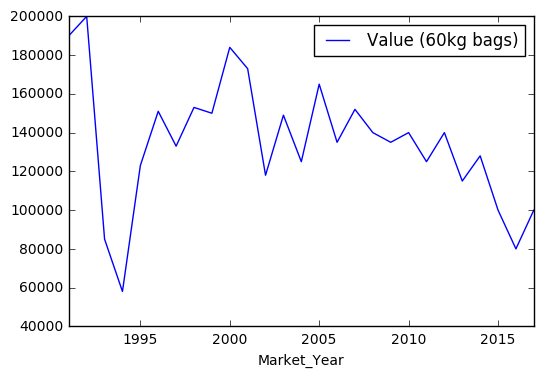

In [27]:
production_data[(production_data["Country_Name"] == "Bolivia") & (production_data["Attribute_Description"] == "Arabica Production") & (production_data["Market_Year"] > 1990)].plot(x = "Market_Year", y = "Value (60kg bags)")